In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
torch.manual_seed(42)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [5]:
df = pd.read_csv('data/fmnist/fashion-mnist_train.csv')
df.head()
len(df)

60000

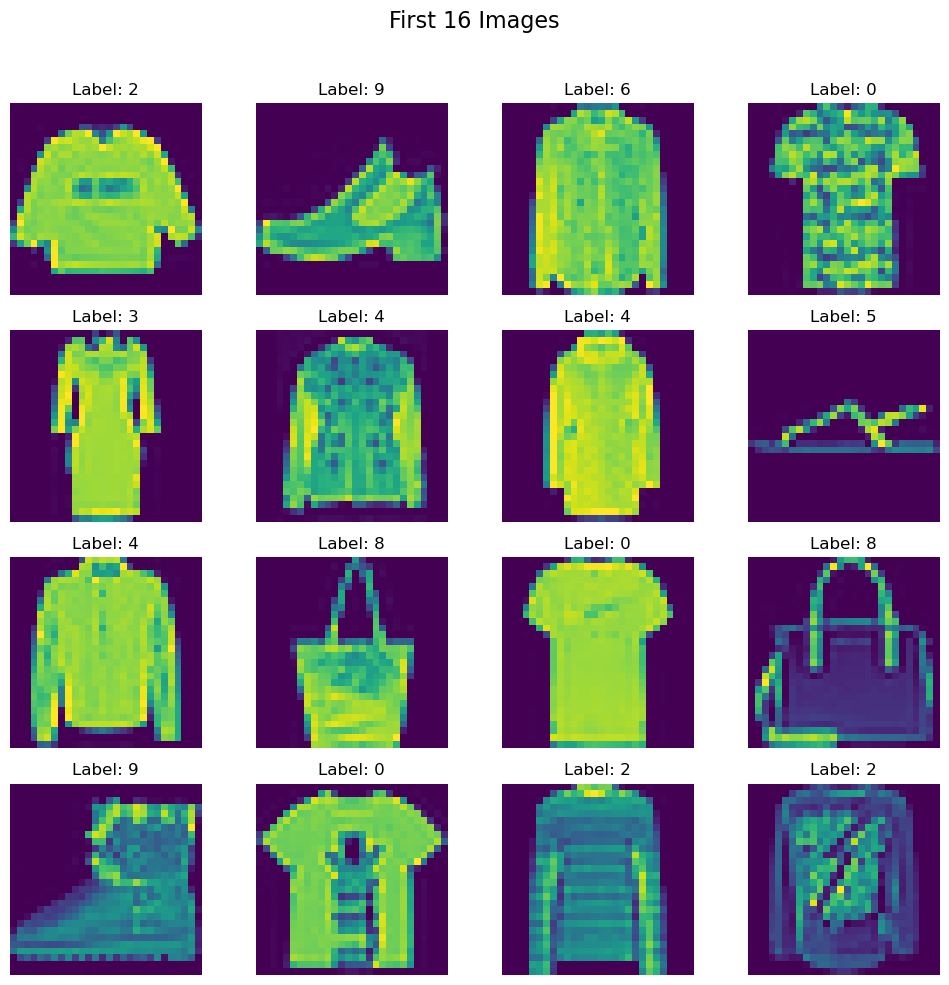

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [13]:
# Create datasets
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [14]:
# Basic Sanity check 
print(f'Train dataset size: {len(train_dataset)}')
print(f'First sample: {train_dataset[0][0].shape}')

Train dataset size: 48000
First sample: torch.Size([784])


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [16]:
# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 10)  # 10 classes for Fashion MNIST dataset
        )
    
    def forward(self, x):
        return self.model(x)

In [17]:
epochs = 100
learning_rate = 0.001

In [18]:
model = SimpleNN(input_size=784, hidden_size1=128, hidden_size2=64)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
len(train_loader), len(test_loader)

(1500, 375)

In [20]:
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for batch_idx, (batch_features, batch_labels) in enumerate(train_loader):
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f'epoch {epoch+1} loss: {epoch_loss/len(train_loader):.4f}')

epoch 1 loss: 0.5527
epoch 2 loss: 0.3927
epoch 3 loss: 0.3545
epoch 4 loss: 0.3282
epoch 5 loss: 0.3074
epoch 6 loss: 0.2899
epoch 7 loss: 0.2784
epoch 8 loss: 0.2672
epoch 9 loss: 0.2547
epoch 10 loss: 0.2456
epoch 11 loss: 0.2389
epoch 12 loss: 0.2298
epoch 13 loss: 0.2206
epoch 14 loss: 0.2144
epoch 15 loss: 0.2071
epoch 16 loss: 0.2013
epoch 17 loss: 0.1942
epoch 18 loss: 0.1906
epoch 19 loss: 0.1828
epoch 20 loss: 0.1772
epoch 21 loss: 0.1736
epoch 22 loss: 0.1694
epoch 23 loss: 0.1652
epoch 24 loss: 0.1605
epoch 25 loss: 0.1557
epoch 26 loss: 0.1523
epoch 27 loss: 0.1488
epoch 28 loss: 0.1440
epoch 29 loss: 0.1402
epoch 30 loss: 0.1360
epoch 31 loss: 0.1345
epoch 32 loss: 0.1305
epoch 33 loss: 0.1278
epoch 34 loss: 0.1237
epoch 35 loss: 0.1277
epoch 36 loss: 0.1189
epoch 37 loss: 0.1148
epoch 38 loss: 0.1138
epoch 39 loss: 0.1140
epoch 40 loss: 0.1105
epoch 41 loss: 0.1093
epoch 42 loss: 0.1061
epoch 43 loss: 0.1024
epoch 44 loss: 0.0988
epoch 45 loss: 0.1039
epoch 46 loss: 0.09

In [21]:
model.eval()


SimpleNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [22]:
with torch.no_grad():
    correct = 0
    for batch_features, batch_labels in test_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == batch_labels).sum().item()
    accuracy = 100 * correct / len(test_dataset)
    print(f'Accuracy of the model on the test set: {accuracy:.4f}%')


Accuracy of the model on the test set: 89.1250%
